# __중고차 적정 가격 판단 모델__
* 2023 BigData Team Project
* 안지은(사회과학대학 문헌정보학과 2020), 이정윤(사회과학대학 문헌정보학과 20202651)
* [DataSet Link](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)



## 목차
0. Introduction
1. Module Import 
2. Data Preprocessing     
        2.1. Feature Scaling    
        2.2. Feature Selection    
3. Training     
        3.1. Dataset Split    
        3.2. Clustering
4. Evaluation
5. Result

## 0️⃣ Introduction

블라블라~

## 1️⃣ Module Import

In [2]:
pip install sklearn

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2960 sha256=47b7cef092418b83349d50abf091177df3cf76c71053684e68e8f20bcdd03465
  Stored in directory: /Users/jeongyunl/Library/Caches/pip/wheels/9e/9e/4c/184e84f4ce918378a9ec9adafd1b6b73bea45f0a4a7855b6ce
Successfully built sklearn


In [3]:
pip install metrics

In [6]:
pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import csv
import numpy as np
from tqdm import tqdm

import seaborn as sns ## for visualization
import matplotlib.pyplot as plt ## for visualization
from sklearn.decomposition import PCA ## for visualization

from sklearn.preprocessing import MinMaxScaler ## MinMax Normalization
from sklearn.cluster import KMeans ## Kmeans
from sklearn.cluster import DBSCAN ## DBSCAN
from sklearn.neighbors import NearestNeighbors ## for DBSCAN

import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score ## silhouette method
from yellowbrick.cluster.elbow import kelbow_visualizer ## elbow method
from sklearn.decomposition import PCA ## for visualization

## 2️⃣ Data Preprocessing

* drop null rows
* drop unnecessary columns

In [18]:
df_raw = pd.read_csv('vehicles.csv')
df_raw.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [19]:
len(df_raw)

426880

In [20]:
df_raw.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [21]:
df_raw.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [24]:
# 필요한 컬럼만 남기기
# null이 너무 많은 컬럼은 제거
df = df_raw[['id', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color', 'description']].copy()
df.dropna(inplace=True)
df

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,description
31,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,pickup,black,Carvana is the safer way to buy a car During t...
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver,Carvana is the safer way to buy a car During t...
34,7316285779,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,other,fwd,other,black,Carvana is the safer way to buy a car During t...
426860,7301951544,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,automatic,4wd,other,black,Carvana is the safer way to buy a car During t...
426866,7301949190,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,automatic,rwd,other,black,Carvana is the safer way to buy a car During t...
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,automatic,rwd,sedan,white,Carvana is the safer way to buy a car During t...


### Feature Scaling
* 참고: https://www.kaggle.com/code/emilytries/clustering-and-feature-selection

### Encoding

### Feature Selection

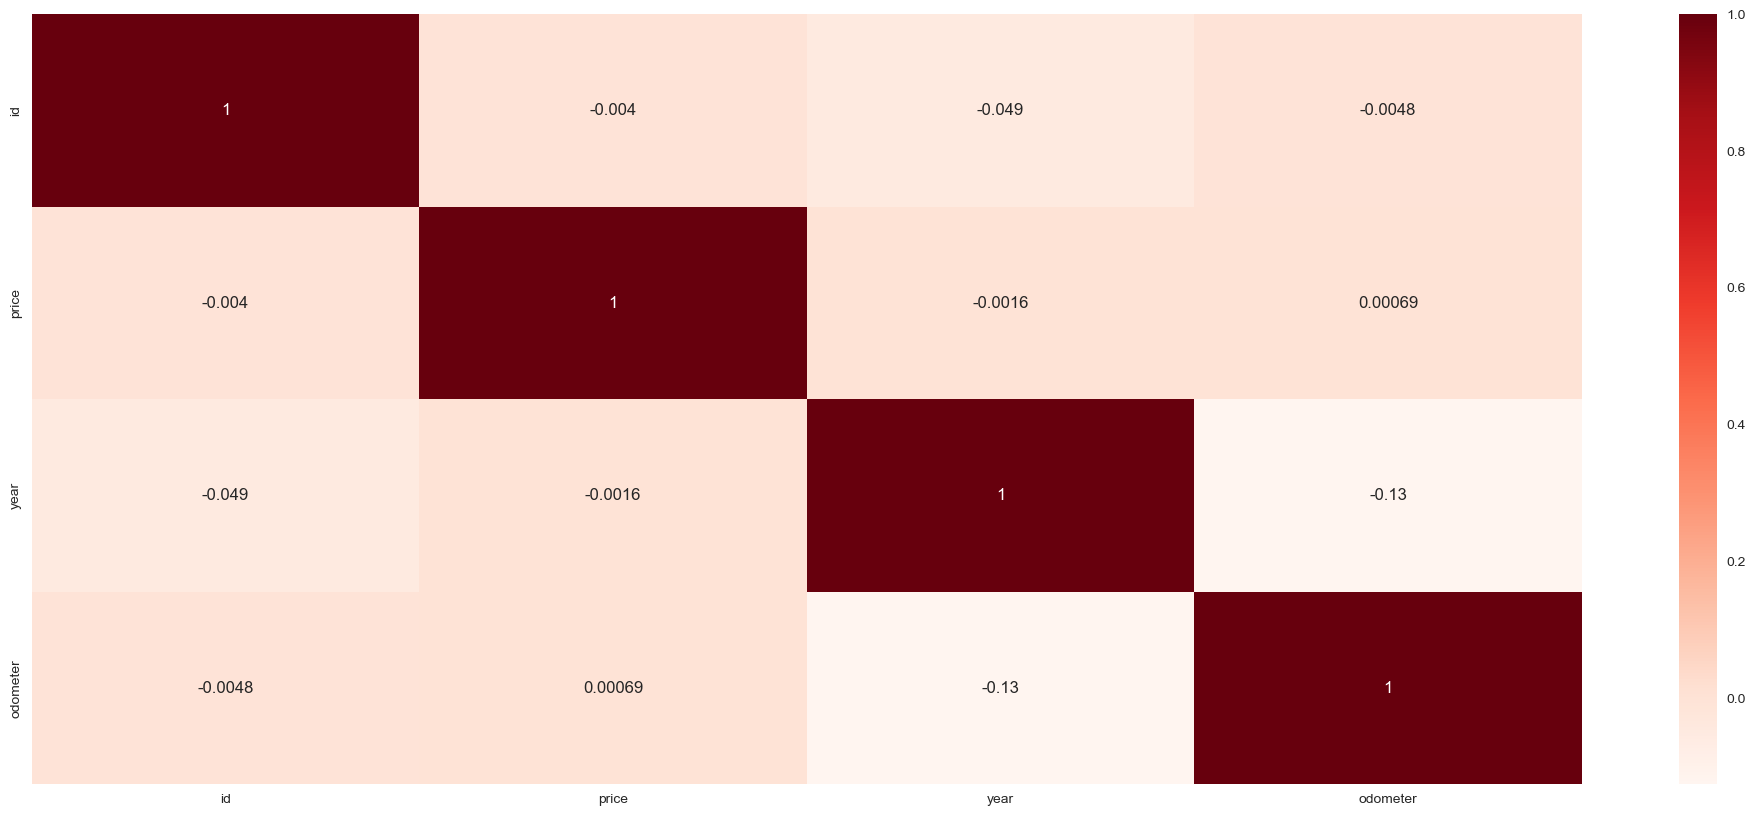

In [43]:
plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:>

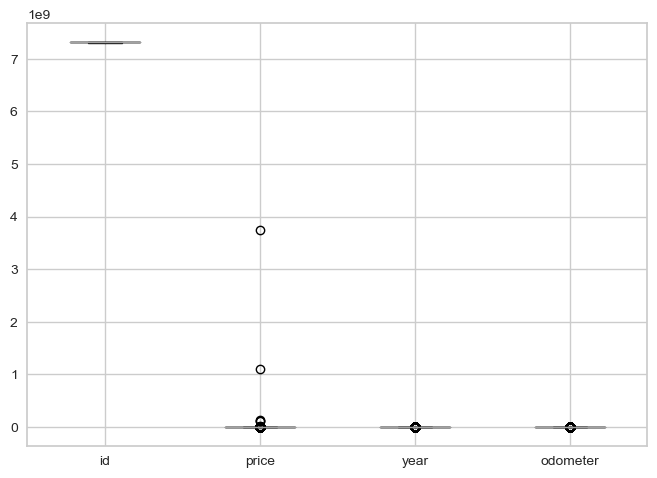

In [40]:
df.boxplot()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'odometer'}>]], dtype=object)

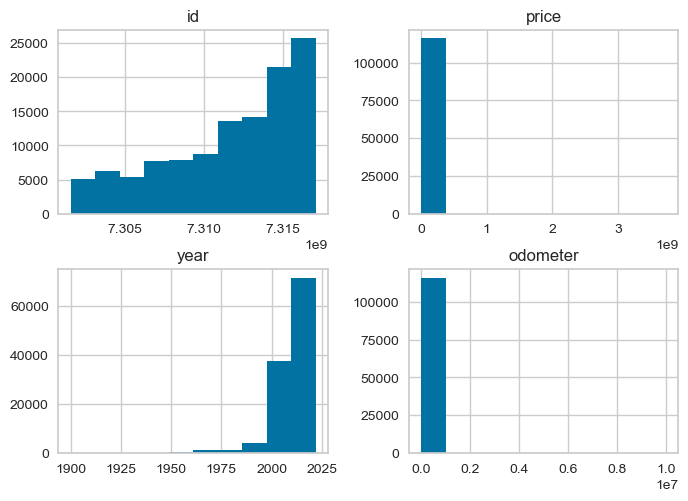

In [41]:
df.hist()

## 3️⃣ Training

### 3-1) Dataset Split

### 3-2) Clustering

## 4) Evaluation

## 6) Result